In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas_datareader as pdr
import datetime as date
import scipy.stats as sp
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# Store data from assignment dataset, (, changed to .  and % was turned into normal numbers)
df_industry = pd.read_excel("QPM_Homework_2024_Dataset.xlsx", header=0, sheet_name=0)
df_factors = pd.read_excel("QPM_Homework_2024_Dataset.xlsx", header=0, sheet_name=1)

# Momentum Calculation (Twelwe previous months minus current)
mom = df_industry.iloc[:,1:].apply(lambda x: x.rolling(12).sum() - x, axis=0).dropna()

# Rankings (1 for the lowest return 49 for the highest return)
ranks = mom.rank(axis=1)

print(mom)
print(ranks)


      Agric   Food    Soda    Beer    Smoke   Toys    Fun     Books   Hshld  \
11  -0.1855 -0.1415  0.0062  0.0118  0.0989 -0.4057 -0.2559 -0.4775 -0.1798   
12  -0.1098 -0.0739  0.0258  0.0064  0.2129 -0.4435 -0.2091 -0.4602 -0.1960   
13  -0.1602 -0.0634  0.0298  0.0077  0.2080 -0.3825 -0.3194 -0.4254 -0.1977   
14  -0.1792 -0.0539 -0.0401 -0.0103  0.1733 -0.2897 -0.2928 -0.3543 -0.1503   
15  -0.2042 -0.0836 -0.0682 -0.0820  0.0542 -0.2903 -0.2367 -0.3573 -0.1506   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
658  0.1003 -0.0253  0.0613 -0.0169  0.1033  0.0799  0.1861  0.1907  0.1250   
659  0.0798 -0.0323  0.0679 -0.0628  0.0898 -0.0214  0.1898  0.2603  0.0550   
660  0.0580 -0.0901  0.0449 -0.1257  0.0852 -0.1278  0.2203  0.2325  0.0505   
661  0.1930  0.0036  0.0940 -0.0491  0.2349 -0.0338  0.2248  0.2053  0.0574   
662  0.2078  0.0973  0.2121  0.0110  0.3388  0.0209  0.3966  0.2841  0.1885   

      Clths  ...   Boxes   Trans   Whlsl   Rtail   

In [3]:
ranks = ranks.reset_index(drop=True)
mom = mom.reset_index(drop=True)

portfolio_returns = pd.DataFrame(index=mom.index, columns=[f'Q{i+1}' for i in range(7)])

# Shift ranks by 1 month to apply the lag
lagged_ranks = ranks.shift(1)

# Calculate returns for each portfolio
for i in range(7):
    lower_bound = i * 7 + 1
    upper_bound = lower_bound + 7
    
    for month in mom.index:
        # Identify industries in the current portfolio (Q1, Q2, ..., Q7)
        industries_in_portfolio = lagged_ranks.columns[
            (lagged_ranks.loc[month] >= lower_bound)
        ]
        
        # Calculate the average return for the selected industries in the current month
        avg_return = mom.loc[month, industries_in_portfolio].mean()
        
        portfolio_returns.loc[month, f'Q{i+1}'] = avg_return


portfolio_returns = portfolio_returns.astype(float).dropna()
print(portfolio_returns)

           Q1        Q2        Q3        Q4        Q5        Q6        Q7
1   -0.260914 -0.195300 -0.155337 -0.102521 -0.058195 -0.008700  0.063671
2   -0.264506 -0.186183 -0.142746 -0.095414 -0.052490 -0.024350  0.039729
3   -0.207192 -0.133698 -0.091409 -0.051618 -0.025881  0.012307  0.070343
4   -0.192437 -0.133986 -0.096857 -0.063200 -0.035771 -0.014486  0.033000
5   -0.200524 -0.128421 -0.088163 -0.050443 -0.013295  0.013014  0.077386
..        ...       ...       ...       ...       ...       ...       ...
647  0.208157  0.233271  0.256571  0.280811  0.321505  0.364579  0.438357
648  0.149506  0.179343  0.197174  0.226643  0.244538  0.280893  0.299114
649  0.101349  0.133555  0.156111  0.182075  0.204352  0.233829  0.253914
650  0.182833  0.215121  0.238111  0.263857  0.265824  0.280450  0.296600
651  0.246488  0.283974  0.310440  0.328446  0.358381  0.369236  0.467843

[651 rows x 7 columns]


In [4]:

# Q7-Q1 portfolio
long_short_portfolio = portfolio_returns.iloc[:, -1] - portfolio_returns.iloc[:, 0]

# Concat all the strategies
summarized = portfolio_returns.join(long_short_portfolio.rename("Q7-Q1"))
print(summarized)

           Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
1   -0.260914 -0.195300 -0.155337 -0.102521 -0.058195 -0.008700  0.063671   
2   -0.264506 -0.186183 -0.142746 -0.095414 -0.052490 -0.024350  0.039729   
3   -0.207192 -0.133698 -0.091409 -0.051618 -0.025881  0.012307  0.070343   
4   -0.192437 -0.133986 -0.096857 -0.063200 -0.035771 -0.014486  0.033000   
5   -0.200524 -0.128421 -0.088163 -0.050443 -0.013295  0.013014  0.077386   
..        ...       ...       ...       ...       ...       ...       ...   
647  0.208157  0.233271  0.256571  0.280811  0.321505  0.364579  0.438357   
648  0.149506  0.179343  0.197174  0.226643  0.244538  0.280893  0.299114   
649  0.101349  0.133555  0.156111  0.182075  0.204352  0.233829  0.253914   
650  0.182833  0.215121  0.238111  0.263857  0.265824  0.280450  0.296600   
651  0.246488  0.283974  0.310440  0.328446  0.358381  0.369236  0.467843   

        Q7-Q1  
1    0.324586  
2    0.304235  
3    0.277535  
4    0.2254

In [5]:
stds = summarized.std(axis=0)
means = summarized.mean(axis=0)
stde = stds / ((len(summarized)) ** 0.5)

t_stat = means / stde

# Two tailed t test p values
pval = 2 * sp.t.sf(abs(t_stat), df=len(summarized) - 1)

pd.options.display.float_format = '{:.3f}'.format

print(means)
print(stds)
print(len(summarized))
print(t_stat)
print(pd.Series(pval, index=t_stat.index))

Q1      0.112
Q2      0.149
Q3      0.177
Q4      0.204
Q5      0.235
Q6      0.274
Q7      0.337
Q7-Q1   0.225
dtype: float64
Q1      0.160
Q2      0.156
Q3      0.156
Q4      0.156
Q5      0.158
Q6      0.162
Q7      0.178
Q7-Q1   0.087
dtype: float64
651
Q1      17.783
Q2      24.393
Q3      28.923
Q4      33.353
Q5      37.836
Q6      42.995
Q7      48.366
Q7-Q1   65.772
dtype: float64
Q1      0.000
Q2      0.000
Q3      0.000
Q4      0.000
Q5      0.000
Q6      0.000
Q7      0.000
Q7-Q1   0.000
dtype: float64


In [7]:
# Part 2 - Realized alpha calculation

# CAPM model
data_endog = summarized["Q7-Q1"]

#Trimming the first 12 observations (11 from momentum calculation and twefth from ranks shift)
data_exog_capm = df_factors["Mkt-RF"].iloc[(len(df_factors) - len(data_endog)):]
data_exog_capm.index = data_endog.index
data_exog_capm = sm.add_constant(data_exog_capm, prepend=True)

capm = sm.OLS(data_endog, data_exog_capm)

pd.options.display.float_format = '{:.3f}'.format

res_capm = capm.fit()
print(res_capm.summary())
print(res_capm.params["const"])


                            OLS Regression Results                            
Dep. Variable:                  Q7-Q1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.331
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.249
Time:                        11:42:48   Log-Likelihood:                 663.58
No. Observations:                 651   AIC:                            -1323.
Df Residuals:                     649   BIC:                            -1314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2260      0.003     65.285      0.0

In [8]:
# Fama French 3 F
data_exog_ff3 = df_factors[["Mkt-RF", "SMB", "HML"]].iloc[(len(df_factors) - len(data_endog)):]
data_exog_ff3.index = data_endog.index
data_exog_ff3 = sm.add_constant(data_exog_ff3, prepend=True)

ff3 = sm.OLS(data_endog, data_exog_ff3)

res_ff3 = ff3.fit()
print(res_ff3.summary())
print(res_ff3.params["const"])

                            OLS Regression Results                            
Dep. Variable:                  Q7-Q1   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.287
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0204
Time:                        11:42:49   Log-Likelihood:                 667.84
No. Observations:                 651   AIC:                            -1328.
Df Residuals:                     647   BIC:                            -1310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2251      0.003     64.905      0.0

In [9]:
# Fama French 5 F
data_exog_ff5 = df_factors[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]].iloc[(len(df_factors) - len(data_endog)):]
data_exog_ff5.index = data_endog.index
data_exog_ff5 = sm.add_constant(data_exog_ff5, prepend=True)

ff5 = sm.OLS(data_endog, data_exog_ff5)

res_ff5 = ff5.fit()

print(res_ff5.summary())
print(res_ff5.params["const"])

                            OLS Regression Results                            
Dep. Variable:                  Q7-Q1   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.943
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0123
Time:                        11:42:51   Log-Likelihood:                 670.26
No. Observations:                 651   AIC:                            -1329.
Df Residuals:                     645   BIC:                            -1302.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.004     62.627      0.0

In [10]:
# Fama French 6 F
data_exog_ff6 = df_factors[["Mkt-RF", "SMB", "HML", "RMW", "CMA", "Mom"]].iloc[(len(df_factors) - len(data_endog)):]
# Creating one lag in Mom
data_exog_ff6["Mom"] = data_exog_ff6["Mom"].shift(1)
data_exog_ff6 = data_exog_ff6.iloc[1:,]
data_exog_ff6.index = data_endog.iloc[1:,].index

data_exog_ff6 = sm.add_constant(data_exog_ff6, prepend=True)

ff6 = sm.OLS(data_endog.iloc[1:,], data_exog_ff6)

res_ff6 = ff6.fit()

print(res_ff6.summary())
print(res_ff6.params["const"])

                            OLS Regression Results                            
Dep. Variable:                  Q7-Q1   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5.120
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.76e-05
Time:                        11:42:53   Log-Likelihood:                 677.21
No. Observations:                 650   AIC:                            -1340.
Df Residuals:                     643   BIC:                            -1309.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.004     62.116      0.0

In [11]:
# PART 3 Portfolio optimization 
# months offset = 2024/9 - 2014/1 = 12 * 10 + 9  = 129
# Benchmark 1 200/100

offset = 129
portfolio_returns_ds = portfolio_returns.iloc[:-offset,:]

# Covariance matrix
covar = pd.DataFrame(np.cov(portfolio_returns_ds, rowvar=False), columns=portfolio_returns_ds.columns)

# Mean risk free rate
mean_rf = df_factors["RF"].iloc[:-offset].mean()

# Returns calculation
bench1 = portfolio_returns_ds.iloc[:, -1] * 2 - portfolio_returns_ds.iloc[:, 0]

weights_b1 = [-1, 0, 0, 0, 0, 0, 2]

print(bench1)

1     0.388
2     0.344
3     0.348
4     0.258
5     0.355
       ... 
518   0.683
519   0.642
520   0.700
521   0.694
522   0.688
Length: 522, dtype: float64


In [12]:
# Benchmark 2 Equally weighted long only

#Returns Calculation
bench2 = portfolio_returns_ds.mean(axis=1)

# Weights calculation
weights_b2 = [1/portfolio_returns_ds.shape[1]] * portfolio_returns_ds.shape[1]

print(bench2)

1     -0.102
2     -0.104
3     -0.061
4     -0.072
5     -0.056
       ...  
518    0.344
519    0.290
520    0.342
521    0.367
522    0.374
Length: 522, dtype: float64


In [13]:
# Minimum Variance Portfolio

# Identity vector
idv = np.ones(covar.shape[0])

covar_inv = np.linalg.inv(covar)

weights_mv = covar_inv @ idv / (idv @ covar_inv @ idv)

returns_mv = portfolio_returns_ds @ weights_mv

print(returns_mv)

1     -0.024
2      0.004
3      0.085
4      0.015
5      0.041
       ...  
518    0.423
519    0.345
520    0.446
521    0.452
522    0.462
Length: 522, dtype: float64


In [14]:
# Tangency portofolio
means_tang = portfolio_returns_ds.mean(axis=0)

weights_tang = (covar_inv @ (means_tang - mean_rf)) / (idv @ covar_inv @ (means_tang - mean_rf))

returns_tang = portfolio_returns_ds @ weights_tang

print(returns_tang)

1     1.622
2     1.753
3     1.700
4     1.375
5     1.619
       ... 
518   1.430
519   1.309
520   1.462
521   1.399
522   1.482
Length: 522, dtype: float64


In [15]:
# Minimum Variance EPO
alpha = 0.2

# Diagonal variance matrix creation
diag = np.diag(covar)
v = np.diag(diag)

shrinked_cov = (1 - alpha) * covar + alpha * v
shrinked_cov_inv = np.linalg.inv(shrinked_cov)

weights_mv_epo = shrinked_cov_inv @ idv / (idv @ shrinked_cov_inv @ idv)

returns_mv_epo = portfolio_returns_ds @ weights_mv_epo

print(returns_mv_epo)

1     -0.121
2     -0.118
3     -0.074
4     -0.082
5     -0.069
       ...  
518    0.331
519    0.277
520    0.329
521    0.355
522    0.363
Length: 522, dtype: float64


In [16]:
# Tangency portfolio EPO
weights_tang_epo = (shrinked_cov_inv @ (means_tang - mean_rf)) / (idv @ shrinked_cov_inv @ (means_tang - mean_rf))

returns_tang_epo =  portfolio_returns_ds @ weights_tang_epo

print(returns_tang_epo)

1     0.482
2     0.437
3     0.425
4     0.327
5     0.430
       ... 
518   0.711
519   0.673
520   0.723
521   0.719
522   0.723
Length: 522, dtype: float64


In [85]:
# Performance metrics
# Concat returns from all strategies
df_returns = pd.concat([bench1, bench2, returns_mv, returns_tang, returns_mv_epo, returns_tang_epo], axis=1)

# Placeholders
mju = []
sigma = []
sharpe = []
a_sharpe = [] 

for i in range(df_returns.shape[1]):
    mju.append(df_returns.iloc[:, i].mean())
    sigma.append(df_returns.iloc[:, i].std())
    sharpe.append((mju[i] - mean_rf)/sigma[i])
    a_sharpe.append(sharpe[i] * (12 ** (0.5)))

metrics = pd.DataFrame({
    'Mean Return': mju,
    'Std Dev': sigma,
    'Sharpe Ratio': sharpe,
    'Annualized Sharpe': a_sharpe
}, index=["Bench 1", "Bench 2", "Min Var", "Tangency", "Min Var EPO", "Tangecy EPO"])

weights = pd.DataFrame({
    'Bench 1' : weights_b1,
    'Bench 2' : weights_b2,
    'Min Var' : weights_mv,
    'Tangency' : weights_tang,
    'Min Var EPO' : weights_mv_epo,
    'Tangency EPO' : weights_tang_epo
}, index=[f'Q{i + 1}' for i in range(portfolio_returns_ds.shape[1])])

print(metrics)
print(weights)

             Mean Return  Std Dev  Sharpe Ratio  Annualized Sharpe
Bench 1            0.559    0.223         2.492              8.633
Bench 2            0.212    0.163         1.275              4.417
Min Var            0.228    0.156         1.430              4.953
Tangency           1.260    0.371         3.387             11.734
Min Var EPO        0.198    0.162         1.195              4.138
Tangecy EPO        0.606    0.225         2.669              9.247
    Bench 1  Bench 2  Min Var  Tangency  Min Var EPO  Tangency EPO
Q1       -1    0.143   -3.104   -11.578        0.115        -1.202
Q2        0    0.143    4.488    -3.504        0.178        -0.605
Q3        0    0.143   -1.990    10.184        0.184        -0.193
Q4        0    0.143    4.212     4.782        0.189         0.199
Q5        0    0.143   -3.422    -1.510        0.159         0.562
Q6        0    0.143    1.187     3.672        0.132         0.956
Q7        2    0.143   -0.372    -1.046        0.042         1

              mean  sigma  Sharpe  Annualized Sharpe
Bench 1      0.576  0.258   2.226              7.711
Bench 2      0.213  0.138   1.530              5.300
Min Var      0.235  0.121   1.931              6.689
Tangency     1.257  0.343   3.661             12.681
Min Var EPO  0.198  0.134   1.464              5.073
Tangency EPO 0.616  0.255   2.408              8.342
                  Mean  Max Drawdown  Drowdawn Ratio
Bench 1        201.971         0.000            -inf
Bench 2          8.424        -0.091          92.211
Min Var         10.882        -0.023         472.976
Tangency     15334.884         0.000            -inf
Min Var EPO      7.144        -0.104          68.897
Tangency EPO   275.243         0.000            -inf


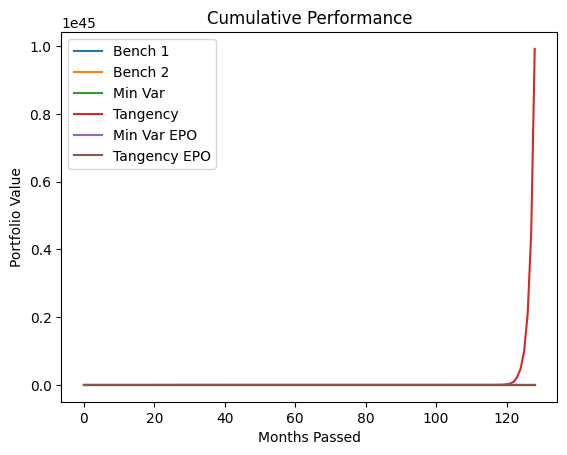

In [78]:
# Part 4 - Application to the testing sample

# Portfolio returns in test sample (last 129 observations)
portfolio_returns_ts = portfolio_returns.iloc[len(portfolio_returns) - offset:].reset_index(drop=True)
strategies_returns = portfolio_returns_ts @ weights

mean_rf_ts = df_factors["RF"].iloc[len(df_factors) - offset:].mean()

mju_ts = strategies_returns.mean(axis=0)
std_ts = strategies_returns.std(axis=0)
sharpe_ts = (mju_ts - mean_rf_ts)/std_ts
a_sharpe_ts = sharpe_ts * (12 ** (0.5))

init = 1

ts_resuts = pd.concat([mju_ts, std_ts, sharpe_ts, a_sharpe_ts], axis=1)
ts_resuts.columns = ["mean", "sigma", "Sharpe", "Annualized Sharpe"]

# cumul_perf = init * np.log((1 + strategies_returns).cumprod())
cumul_perf = init * (1 + strategies_returns).cumprod()

a_mju = cumul_perf.iloc[-1] ** (12 / offset) - 1 

mju_gm = sp.gmean(1 + strategies_returns) - 1
a_mju_gm = (1 + mju_gm) ** (12) - 1

mju_log = np.log(1 + strategies_returns).mean()
a_mju_log = 12 * mju_log

a_mju_s = np.exp(a_mju_log) - 1

cumul_max = cumul_perf.cummax()

drawdowns = cumul_perf / cumul_max - 1

max_drawdowns = drawdowns.min()

drawdown_ratio = -a_mju / max_drawdowns

lt_metrics = pd.concat([a_mju, max_drawdowns, drawdown_ratio], axis=1)
lt_metrics.columns = ["Mean", "Max Drawdown", "Drowdawn Ratio"]
plt.title("Cumulative Performance")
plt.ylabel("Portfolio Value")
plt.xlabel("Months Passed")
for i in range(cumul_perf.shape[1]):
    plt.plot(cumul_perf.iloc[:,i], label=cumul_perf.columns[i])
plt.legend()

print(ts_resuts)
print(lt_metrics)

In [84]:
# table
print("\\begin{table}[H]")
print("    \\caption{Long-Term Performance Metrics}")
print("    \\begin{tabular}{|c|c|c|c|}")
print("        \\hline")
print("        Portfolio & ($\\mu_{w,p.a.}$) & Max Drawdown & Drawdown Ratio \\\\ \\hline")

for row in range(lt_metrics.shape[0]):
    temp = []
    temp.append(lt_metrics.index[row])
    for col in range(lt_metrics.shape[1]):
        temp.append(f"{lt_metrics.iloc[row, col]:.3f}")
    print("        " + " & ".join(temp) + " \\\\ \\hline")

print("    \\end{tabular}")
print("    \\label{tab:your_table_label}")
print("\\end{table}")

\begin{table}[H]
    \caption{Long-Term Performance Metrics}
    \begin{tabular}{|c|c|c|c|}
        \hline
        Portfolio & ($\mu_{w,p.a.}$) & Max Drawdown & Drawdown Ratio \\ \hline
        Bench 1 & 201.971 & 0.000 & -inf \\ \hline
        Bench 2 & 8.424 & -0.091 & 92.211 \\ \hline
        Min Var & 10.882 & -0.023 & 472.976 \\ \hline
        Tangency & 15334.884 & 0.000 & -inf \\ \hline
        Min Var EPO & 7.144 & -0.104 & 68.897 \\ \hline
        Tangency EPO & 275.243 & 0.000 & -inf \\ \hline
    \end{tabular}
    \label{tab:your_table_label}
\end{table}
